In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

---

In [14]:
np.random.seed(42)

X = np.random.rand(1000, 2)
X = np.c_[np.ones(len(X)), X]

epsilon = np.random.normal(loc=0, scale=1, size=1000)

y_data = lambda x, epsilon: (3*x[:,1]) + (5*x[:,2]) + 3 + epsilon

y = y_data(x= X, epsilon= epsilon).reshape(-1, 1)
X.shape

(1000, 3)

## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

---

**a)**

In [10]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        
        theta -= learning_rate * gradient

    return theta


theta_hat = gradient_descent(X, y, learning_rate=0.1, epochs=500)

theta_hat

array([[3.12412199],
       [2.95142955],
       [4.82898238]])

[-0.7790672248090367,
 3.674997842819069,
 4.922842572614482,
 4.856579749701894,
 4.568491972209296,
 4.44582804909902,
 4.158063162628411,
 4.730450815975682,
 3.6485503929242444,
 3.8545906041753035,
 3.9870138881278674,
 4.2340047303141315,
 3.842485430423665,
 3.740782875403388,
 3.7249283460401963,
 3.47756686919405,
 3.686075794930038,
 4.093275022068073,
 3.368978282898845,
 3.7241121022962256,
 3.573366109861037,
 4.0022248120688655,
 3.538025203908706,
 3.432221746225803,
 3.704594505990596,
 3.5519942165006073,
 3.6771286400310785,
 3.676784679742791,
 3.5785196910926937,
 3.2803284387329565,
 3.2483397528039206,
 3.461572480656362,
 3.4443331711705625,
 3.2862509041034107,
 3.408457890205269,
 3.1755685980096238,
 3.3544534635939574,
 3.248968200116366,
 3.267603592446902,
 3.360224868703508,
 3.3279672050043474,
 3.2808348029504244,
 3.2815320774539787,
 3.2847703731932607,
 3.174392493176348,
 3.258574972903352,
 3.291711913019459,
 3.2905798585825665,
 3.3098339632118003

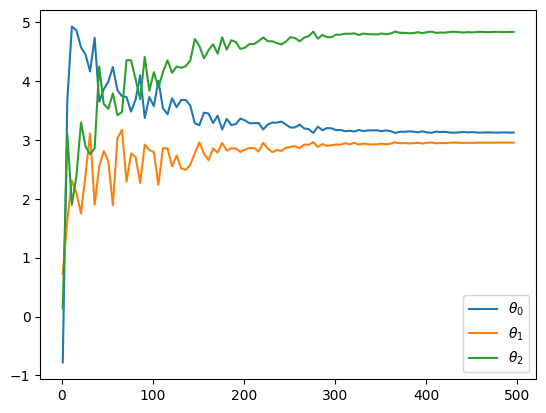

In [17]:
theta_0 = []
theta_1 = []
theta_2 = []

steps = range(1, 500, 5)

for i in steps:

    theta_hat = gradient_descent(X, y, learning_rate= 0.1, epochs= i)

    theta_0.append(float(theta_hat[0]))
    theta_1.append(float(theta_hat[1]))
    theta_2.append(float(theta_hat[2]))


sns.lineplot(x= steps, y= theta_0, label= r"$\theta_0$")
sns.lineplot(x= steps, y= theta_1, label= r"$\theta_1$")
sns.lineplot(x= steps, y= theta_2, label= r"$\theta_2$")

theta_0

**b)**

<Axes: >

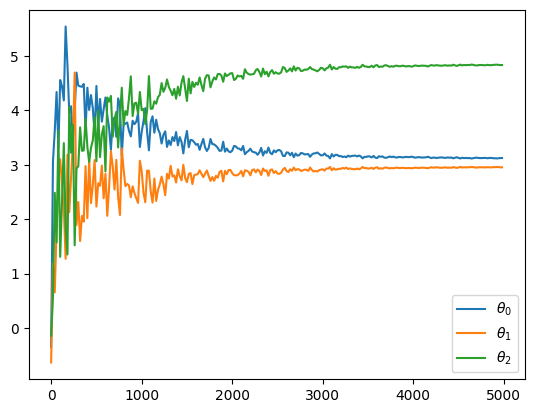

In [12]:
theta_0 = []
theta_1 = []
theta_2 = []

steps = range(1, 5000, 20)

for i in steps:

    theta_hat = gradient_descent(X, y, learning_rate= 0.01, epochs= i)

    theta_0.append(float(theta_hat[0]))
    theta_1.append(float(theta_hat[1]))
    theta_2.append(float(theta_hat[2]))


sns.lineplot(x= steps, y= theta_0, label= r"$\theta_0$")
sns.lineplot(x= steps, y= theta_1, label= r"$\theta_1$")
sns.lineplot(x= steps, y= theta_2, label= r"$\theta_2$")

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

In [13]:
theta_0 = []
theta_1 = []
theta_2 = []

steps = range(1, 500, 5)

def learning_rate_schedule(t):
    t0, t1 = 5, 50
    return t0 / (t + t1)

for x in steps:

    theta = np.random.randn(X.shape[1], 1)

    m = len(X)

    for epoch in range(x):

        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index : random_index + 1]
            y_i = y[random_index : random_index + 1]

            gradient = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
            eta = learning_rate_schedule(epoch*m+i)
            theta -= eta*gradient

    theta_0.append(float(theta[0]))
    theta_1.append(float(theta[1]))
    theta_2.append(float(theta[2]))




KeyboardInterrupt: 

<Axes: >

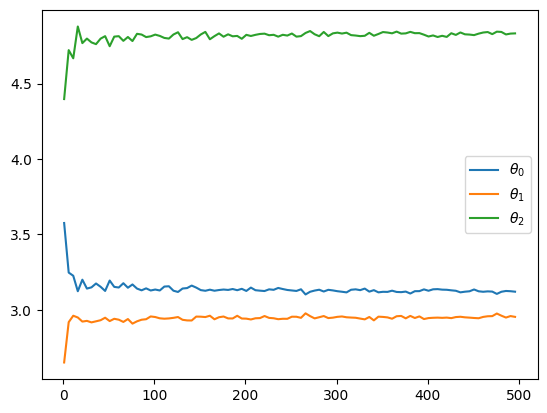

In [ ]:
sns.lineplot(x= steps, y= theta_0, label= r"$\theta_0$")
sns.lineplot(x= steps, y= theta_1, label= r"$\theta_1$")
sns.lineplot(x= steps, y= theta_2, label= r"$\theta_2$")